<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and load the data</a></span><ul class="toc-item"><li><span><a href="#Train-and-Test-Splits" data-toc-modified-id="Train-and-Test-Splits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train and Test Splits</a></span></li><li><span><a href="#1.2-Scaler" data-toc-modified-id="1.2-Scaler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Scaler</a></span></li></ul></li><li><span><a href="#2.-Modeling" data-toc-modified-id="2.-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Modeling</a></span><ul class="toc-item"><li><span><a href="#Dummy-regressor" data-toc-modified-id="Dummy-regressor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy regressor</a></span></li><li><span><a href="#OLS-regressor" data-toc-modified-id="OLS-regressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OLS regressor</a></span><ul class="toc-item"><li><span><a href="#Make-predictions-on-both-train-and-test-splits" data-toc-modified-id="Make-predictions-on-both-train-and-test-splits-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Make predictions on both train and test splits</a></span></li><li><span><a href="#Assess-the-model-performance" data-toc-modified-id="Assess-the-model-performance-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Assess the model performance</a></span></li></ul></li><li><span><a href="#Random-forest-regressor" data-toc-modified-id="Random-forest-regressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random forest regressor</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-search" data-toc-modified-id="Hyperparameter-search-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Hyperparameter search</a></span><ul class="toc-item"><li><span><a href="#search-for-the-number-of-estimators-only" data-toc-modified-id="search-for-the-number-of-estimators-only-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>search for the number of estimators only</a></span></li><li><span><a href="#search-for-the-number-of-estimators,-max_depth,-min_samples_split,-min_samples_leaf,-bootstrap-..." data-toc-modified-id="search-for-the-number-of-estimators,-max_depth,-min_samples_split,-min_samples_leaf,-bootstrap-...-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>search for the number of estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap ...</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Data-Quantity-Assessment" data-toc-modified-id="Data-Quantity-Assessment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Quantity Assessment</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Summary-and-further-analysis" data-toc-modified-id="Summary-and-further-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary and further analysis</a></span></li></ul></div>

## Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import __version__ as sklearn_version
from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid') 
# plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Data/all_sales_summary.csv')
df.head()

,State,avg_sales_state,avg_profit_state,avg_discount_state,avg_wating_days_state,Same_day_ratio,First Class_ratio,Second Class_ratio,Standard Class_ratio,Consumer_ratio,Corporate_ratio,Home_Office_ratio,Furniture_ratio,Office_Supplies_ratio,Technology_ratio
0,Alabama,66.611429,14.281307,0.000000,4.261905,0.143788,0.338325,0.217522,0.300365,0.248680,0.350030,0.401290,0.386966,0.294453,0.318582
1,Arizona,66.156417,5.874764,0.282143,4.130952,0.206702,0.290648,0.331226,0.171423,0.288096,0.372998,0.338906,0.423539,0.138600,0.437862
2,Arkansas,48.697368,12.927255,0.000000,4.184211,0.097925,0.348283,0.270288,0.283504,0.392667,0.279767,0.327566,0.467137,0.272790,0.260074
3,California,74.152678,12.952794,0.065100,3.878159,0.209215,0.269920,0.258783,0.262082,0.349143,0.329902,0.320955,0.254495,0.297346,0.448159
4,Colorado,54.639008,3.092148,0.294697,3.704545,-0.263828,0.381189,0.689374,0.193265,0.422993,0.282505,0.294501,0.323776,0.117573,0.558651


In [3]:
print(df.shape)
df.info()
df.columns

(48, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  48 non-null     object 
 1   avg_sales_state        48 non-null     float64
 2   avg_profit_state       48 non-null     float64
 3   avg_discount_state     48 non-null     float64
 4   avg_wating_days_state  48 non-null     float64
 5   Same_day_ratio         48 non-null     float64
 6   First Class_ratio      48 non-null     float64
 7   Second Class_ratio     48 non-null     float64
 8   Standard Class_ratio   48 non-null     float64
 9   Consumer_ratio         48 non-null     float64
 10  Corporate_ratio        48 non-null     float64
 11  Home_Office_ratio      48 non-null     float64
 12  Furniture_ratio        48 non-null     float64
 13  Office_Supplies_ratio  48 non-null     float64
 14  Technology_ratio       48 non-null     float64
dtyp

Index(['State', 'avg_sales_state', 'avg_profit_state', 'avg_discount_state',
       'avg_wating_days_state', 'Same_day_ratio', 'First Class_ratio',
       'Second Class_ratio', 'Standard Class_ratio', 'Consumer_ratio',
       'Corporate_ratio', 'Home_Office_ratio', 'Furniture_ratio',
       'Office_Supplies_ratio', 'Technology_ratio'],
      dtype='object')

### Train and Test Splits

In order to fit the models on the data, I first define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable). After defining the variables, split the data into a train set and test set using the ‘train_test_split’ function by scikit-learn. 

In [4]:
# to avoid multi-colinearity, drop columns 'Same_day_ratio', 'Consumer_ratio','Furniture_ratio'
Target = ['avg_profit_state']
Features = ['avg_sales_state',  'avg_discount_state',
       'avg_wating_days_state', 'First Class_ratio',
       'Second Class_ratio', 'Standard Class_ratio', 
       'Corporate_ratio', 'Home_Office_ratio', 
       'Office_Supplies_ratio', 'Technology_ratio']
X = df[Features]
y = df[Target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
print(X_train.shape, X_test.shape)
train_columns = X_train.columns

(33, 10) (15, 10)


In [6]:
train_columns

Index(['avg_sales_state', 'avg_discount_state', 'avg_wating_days_state',
       'First Class_ratio', 'Second Class_ratio', 'Standard Class_ratio',
       'Corporate_ratio', 'Home_Office_ratio', 'Office_Supplies_ratio',
       'Technology_ratio'],
      dtype='object')

### 1.2 Scaler

In [7]:
#Call StandardScaler method on `X_tr` to fit the scaler;
# use `transform()` method to apply the scaling to both the train and test split.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Modeling

To build and train five different types of linear regression models:
    - OLS model
    - Lasso regression model
    - Ridge regression model
    - Elastic Net regression model
    - Random forest regression model
    
    The linear regression model assumes a linear relationship between the input and output variables. If this relationship is present, we use Pearson correlation coefficients to measure the direction and strength of the linear relationship between two variables, and use evaluation metrics such as mean square error to measure the predictive power of the linear regression model. 

### Dummy regressor

In [8]:
train_mean = y_train.mean()
train_mean

avg_profit_state    12.822677
dtype: float64

In [9]:
# Fit the skilearn dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[12.82267725]])

### OLS regressor

In [10]:
lm = LinearRegression().fit(X_train, y_train)

#### Make predictions on both train and test splits

In [11]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

#### Assess the model performance

R^2 is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if you want an idea of how "close" your predictions are to the true values.
Metrics that summarize the difference between predicted and actual values are _mean absolute error_ and _mean squared error_.

In [12]:
# r2
lm_r2_score = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
lm_r2_score

(0.9269325480111517, 0.7697678330463447)

 - 𝑅2  tells us how much of the variance we're explaining beyond that of using the mean. we see that the simple linear regression model explains over 91% of the variance on the train set and over 83% on the test set.

In [13]:
# mae
lm_mae = mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)
lm_mae

(0.8379285922716475, 1.5922431736749572)

- On average we expect to estimate a profit within \\$0.96 to \\$1.4 of the real price. This is much, much better than the \\$12 from just guessing using the average.

In [14]:
# rmse
lm_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))
lm_rmse

(1.2601278107611205, 2.413075006141937)

### Random forest regressor

In [15]:
rf_pipe =  make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

In [16]:
rf_cv = cross_validate(rf_pipe, X_train, y_train, cv=5)
rf_cv
rf_cv['test_score']

array([ 0.39610813,  0.56236743,  0.79857221,  0.85930989, -0.13527414])

#### Hyperparameter search

##### search for the number of estimators only

In [17]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=10)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
}
grid_params

{'randomforestregressor__n_estimators': [10,
  16,
  27,
  46,
  77,
  129,
  215,
  359,
  599,
  1000]}

In [18]:
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 16, 27, 46,
                                                                 77, 129, 215,
                                                                 359, 599,
                                                                 1000]})

In [19]:
print(rf_grid_cv.best_params_)

{'randomforestregressor__n_estimators': 1000}


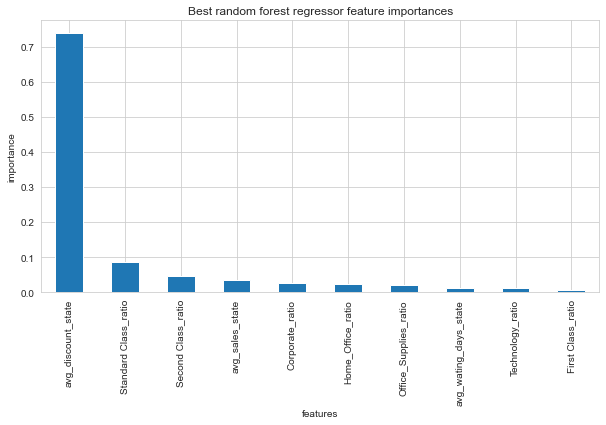

In [20]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

##### search for the number of estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap ...

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# tune number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 57, 65, 73, 81, 89, 97, 105, 113, 121, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [41]:
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 57, 65, 73, 81, 89,
                                                         97, 105, 113, 121, 128,
                                                         136, 144, 152, 160,
                                                         168, 176, 184, 192,
                                                         200]},
                   random_state=42, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 65,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [43]:
rf = RandomForestRegressor(n_estimators=65, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=65, random_state=42)

In [44]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [45]:
rf_r2_score = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
rf_r2_score

(0.9004982785018262, 0.9005991557500471)

In [46]:
# mae
rf_mae = mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)
rf_mae

(1.1256847636520422, 1.1992750824582283)

In [47]:
# rmse
rf_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_rmse

(1.4705097633963309, 1.5855606437198833)

In [48]:
rf_random.best_estimator_.feature_importances_

array([0.02724296, 0.83192343, 0.00834479, 0.        , 0.04966992,
       0.0828189 , 0.        , 0.        , 0.        , 0.        ])

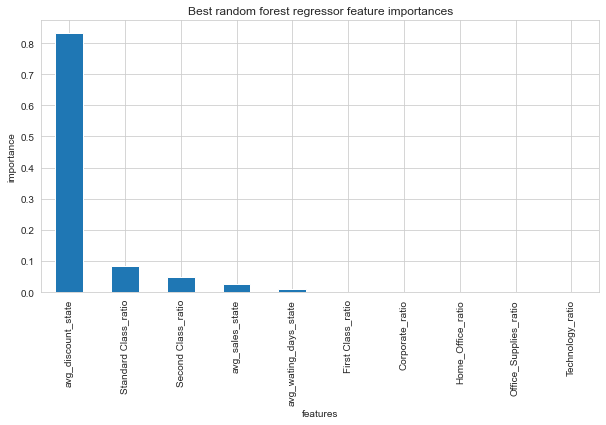

In [49]:
plt.subplots(figsize=(10, 5))
imps = rf_random.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## Data Quantity Assessment

In [31]:
# Would more data be useful?  Assess this trade off by seeing how performance varies with differing data set sizes.
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rf_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

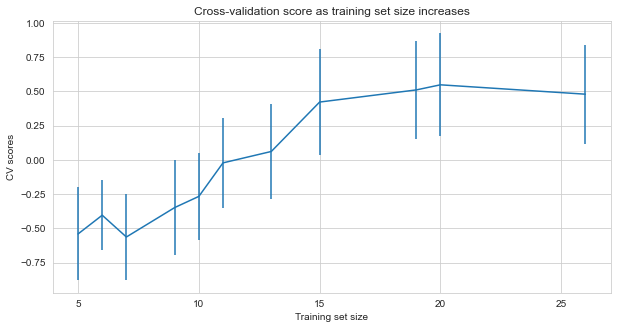

In [32]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

 - There's an initial rapid improvement in model scores as one would expect, but it's essentially leveled off by around a sample size of 20.  This shows that we seem to have plenty of data. 

## Save model

In [33]:
final_model = rf_random.best_estimator_
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.build_datetime = datetime.datetime.now()

# save the model

modelpath = '../models'
save_file(final_model, 'sales_analysis_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models\sales_analysis_model.pkl"


## Summary and further analysis

- Regression models have simplified the complex historical data and generated the clear business insights.